# Procedure: Optimization method for LCDs


- *Luis Miguel Sánchez Brea*
- *16 de junio de 2020*

We have a model of LCD, given by 
* matrices $M_{00}(g.l)$. 
* Ilumination, given by Jones Vector
* Polarimeter system, given by N polarizers.

The idea is two obtain the angles $\theta_1$, ... $\theta_n$ in order to make the field at the output of the SLM:
1. Pure amplitude.
1. Pure phase.

## Load

In [1]:
%load_ext autoreload
%autoreload 2
%load_ext line_profiler

In [2]:
from diffractio import np, sp, plt, um, mm, degrees

from py_pol.jones_matrix import Jones_matrix
from py_pol.jones_vector import Jones_vector

number of processors: 8


In [3]:
from slm import um, mm, degrees, plt, sp, np
from slm.LCD_models import LCD_kopin, LCD_sony
from slm.LCD_jones_matrices import LCD_jones_matrices, get_fields_gl
from slm.utils import rotation


number of processors: 8


In [4]:
from slm.optimizations import (
    amplitude_optimization_parameter, func_amplitude_optimization,
    parameters_proposals_amplitude, optimization_amplitude, phase_optimization_parameter,
    func_phase_optimization, parameters_proposals_phase, optimization_phase)

## incident field

In [5]:
v0=[1/np.sqrt(2),-1j/np.sqrt(2)]

In [6]:
source = Jones_vector()
source.from_matrix(v0);
source.M

array([[ 0.70710678+0.j        ],
       [-0.        -0.70710678j]])

## SLM

In [7]:
LCD_model=LCD_kopin #LCD_kopin, LCD_sony
gl=LCD_model['gl']
num_gl=len(gl)

In [8]:
LCD_experiment = LCD_jones_matrices(LCD_model)

In [9]:
LCD_jones_matrices_gl = LCD_experiment.DC_to_pypol()

## polarizers

In [10]:
pol1 = Jones_matrix('m1')
pol1.diattenuator_linear(p1=1, p2=0, azimuth=0* degrees, length=num_gl, shape_like=LCD_jones_matrices_gl)

pol2 = Jones_matrix('m2')
pol2.retarder_linear(R= 90 * degrees, azimuth=0 * degrees, length=num_gl, shape_like=LCD_jones_matrices_gl)

pol3 = Jones_matrix('m3')
pol3.retarder_linear(R= 90 * degrees, azimuth=0 * degrees, length=num_gl, shape_like=LCD_jones_matrices_gl)

pol4 = Jones_matrix('m4')
pol4.diattenuator_linear(p1=1, p2=0, azimuth=0, length=num_gl, shape_like=LCD_jones_matrices_gl)

polarizers=(pol1, pol2, pol3, pol4)

angles=[0,0,0,0]

# Procedure for amplitude optimization

In [11]:
angles_optim_amplitude=optimization_amplitude(polarizers,
                           LCD_jones_matrices_gl,
                           source,
                           optim_params=(50, 5, 1),
                           seed=np.pi * np.random.rand(4))

Optimization terminated successfully.
         Current function value: -0.654463
         Iterations: 125
         Function evaluations: 213


[ 56.  72. 134.  22.]
[0.96932462 1.2611664  2.34063837 0.38931348]
	range_amplitude: 0.65,
	 min_amplitude: 0.00,
	 range_phases: 70.66


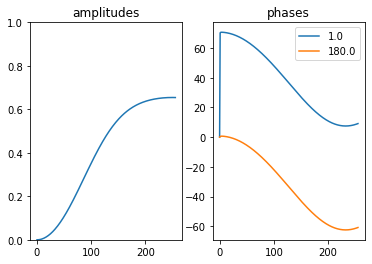

In [12]:
parameters_proposals_amplitude([angles_optim_amplitude,], polarizers,
                                   LCD_jones_matrices_gl, source)

In [13]:
SLM_Jones_amplitude, amplitudes, phases=get_fields_gl(polarizers, LCD_jones_matrices_gl, source, 
                                         angles=angles_optim_amplitude, has_draw=False)

(0.0, 1.0)

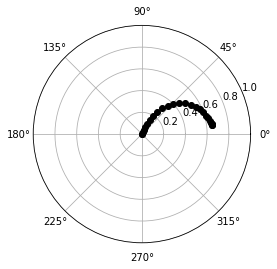

In [14]:
plt.polar(phases[::10], amplitudes[::10], 'ko')
plt.ylim(0,1)

In [15]:
proposals_amplitude_kopin=np.array([
    [0.78534751, 2.0500935,  1.85919493, 1.65223645],
    [3.92700165, 1.1288492 , 2.44585447, 0.49313094],
    [0.75850662, 2.01199855, 3.40118251, 0.48101269],
    [0.78537178, 4.27041243, 4.01662148, 4.39856145],
    [0.78540153, 1.12884032, 2.44581254, 2.06390482],
    [0.78541413, -1.09147374,  0.28840598, -1.07538191],
    [1.53071831, 2.79119309, 0.71754775, 1.0932329 ],
    [2.21699399, 1.01096901, 2.5825134,  0.65029108],
    ])

In [16]:
proposals_amplitude_sony=np.array([
    [ 0.76769162, -0.39574837, -0.08821523, 0.32049111],
])

In [18]:
np.savez("results/procedure - C angles_amplitude_kopin.npz", proposals_amplitude_kopin)
np.savez("results/procedure - C angles_amplitude_sony.npz", proposals_amplitude_sony)

[ 45. 117. 107.  95.]
[0.78534751 2.0500935  1.85919493 1.65223645]
	range_amplitude: 0.56,
	 min_amplitude: 0.14,
	 range_phases: 21.74
[225.  65. 140.  28.]
[3.92700165 1.1288492  2.44585447 0.49313094]
	range_amplitude: 0.56,
	 min_amplitude: 0.14,
	 range_phases: 35.62
[ 43. 115. 195.  28.]
[0.75850662 2.01199855 3.40118251 0.48101269]
	range_amplitude: 0.55,
	 min_amplitude: 0.15,
	 range_phases: 23.71
[ 45. 245. 230. 252.]
[0.78537178 4.27041243 4.01662148 4.39856145]
	range_amplitude: 0.56,
	 min_amplitude: 0.14,
	 range_phases: 35.62
[ 45.  65. 140. 118.]
[0.78540153 1.12884032 2.44581254 2.06390482]
	range_amplitude: 0.56,
	 min_amplitude: 0.14,
	 range_phases: 24.91
[ 45. -63.  17. -62.]
[ 0.78541413 -1.09147374  0.28840598 -1.07538191]
	range_amplitude: 0.56,
	 min_amplitude: 0.14,
	 range_phases: 21.74
[ 88. 160.  41.  63.]
[1.53071831 2.79119309 0.71754775 1.0932329 ]
	range_amplitude: 0.65,
	 min_amplitude: 0.00,
	 range_phases: 90.45
[127.  58. 148.  37.]
[2.21699399 1.0

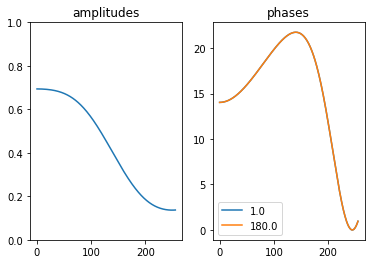

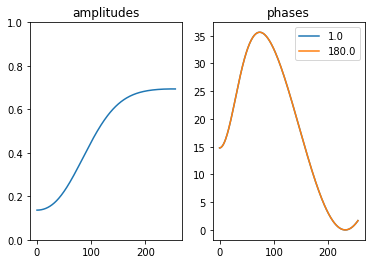

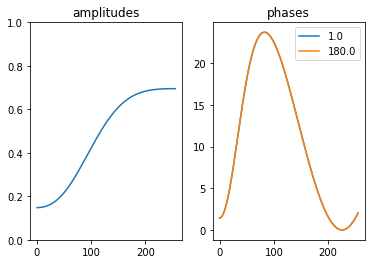

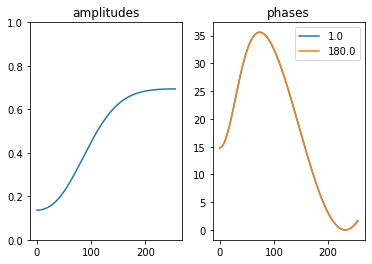

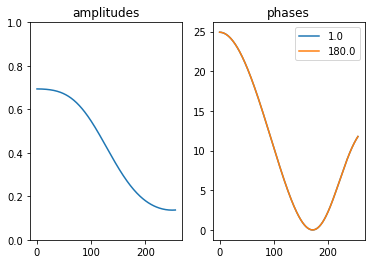

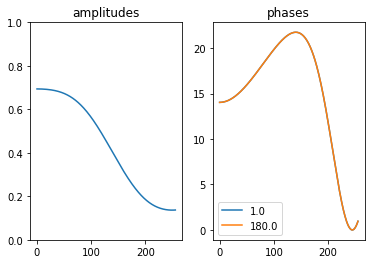

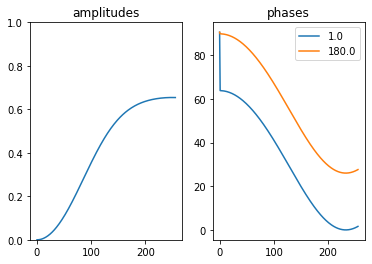

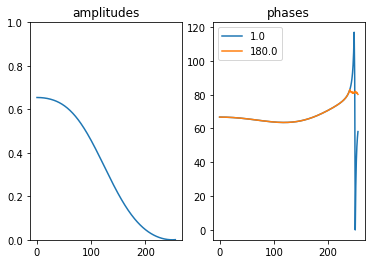

In [19]:
parameters_proposals_amplitude(proposals_amplitude_kopin, polarizers,
                                   LCD_jones_matrices_gl, source)

In [20]:
np.savez(
    "best_amplitude_angles_kopin.npz",
    angles=np.array([2.21699399, 1.01096901, 2.5825134,  0.65029108]))

# Procedure for phase optimization


In [21]:
angles_optim_phase=optimization_phase(polarizers,
                           LCD_jones_matrices_gl,
                           source,
                           optim_params=(1,2, 3),
                           seed=np.pi * np.random.rand(4))

Optimization terminated successfully.
         Current function value: -13305.671122
         Iterations: 298
         Function evaluations: 504


[ 82. -23.  19. 190.]
[ 1.43137223 -0.40092722  0.33208411  3.31320766]
	mean_amplitude: 0.44,
	 std_amplitude: 0.00,
	 range_phase: 136.21


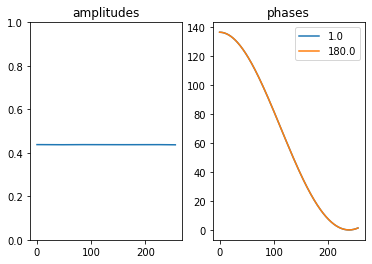

In [22]:
parameters_proposals_phase([angles_optim_phase,], polarizers,
                                   LCD_jones_matrices_gl, source)

In [23]:
SLM_Jones_amplitude, amplitudes, phases = get_fields_gl(
    polarizers,
    LCD_jones_matrices_gl,
    source,
    angles=angles_optim_phase,
    has_draw=False)

(0.0, 1.0)

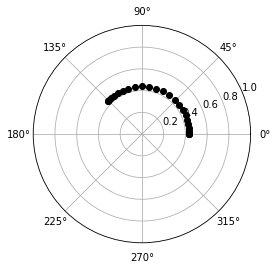

In [24]:
plt.polar(phases[::10], amplitudes[::10], 'ko')
plt.ylim(0,1)

In [25]:
proposals_phase_kopin=np.array([
    [1.19866015, 2.9298312 , 2.09189375, 0.25951049],
    [0.90843298, 1.16997935, 1.90292922, 0.49256759],
    [0.11384613, 2.91475924, 1.98028067, 2.11977297]
])

In [26]:
proposals_phase_sony=np.array([
    [0.85484285, 2.33934276, 0.41303031, 0.96783556],
    [-0.14078423, -0.40188909,  0.33165438,  1.74169166],
    [0.68212244, 0.76846075, 3.55419089, 0.96735988]
])

In [28]:
np.savez("results/procedure - C angles_phase_kopin.npz", proposals_phase_kopin)
np.savez("results/procedure - C angles_phase_sony.npz", proposals_phase_sony)

[ 69. 168. 120.  15.]
[1.19866015 2.9298312  2.09189375 0.25951049]
	mean_amplitude: 0.44,
	 std_amplitude: 0.00,
	 range_phase: 136.23
[ 52.  67. 109.  28.]
[0.90843298 1.16997935 1.90292922 0.49256759]
	mean_amplitude: 0.44,
	 std_amplitude: 0.00,
	 range_phase: 136.22
[  7. 167. 113. 121.]
[0.11384613 2.91475924 1.98028067 2.11977297]
	mean_amplitude: 0.39,
	 std_amplitude: 0.00,
	 range_phase: 120.09


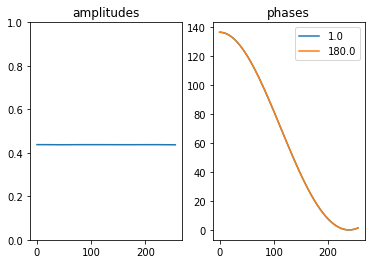

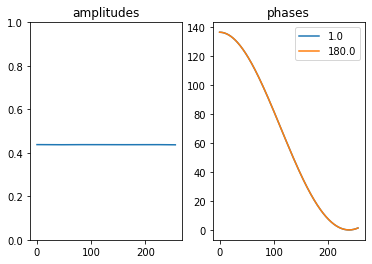

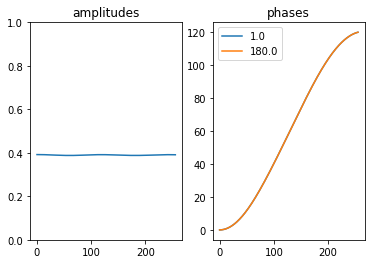

In [29]:
parameters_proposals_phase(proposals_phase_kopin, polarizers,
                                   LCD_jones_matrices_gl, source)

In [30]:
np.savez(
    "best_phase_angles_kopin.npz",
    angles=np.array([0.90843298, 1.16997935, 1.90292922, 0.49256759]))